Датасет Ірис:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\paukd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paukd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paukd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paukd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

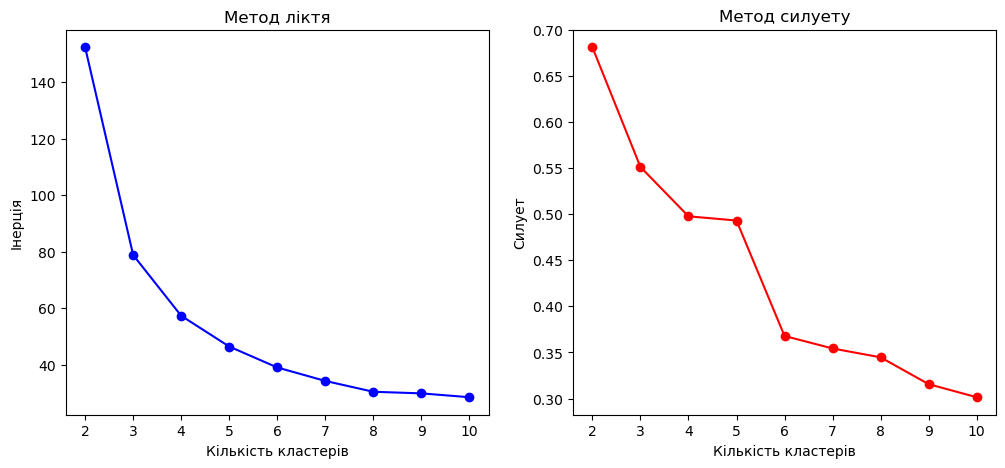

C:\Users\paukd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


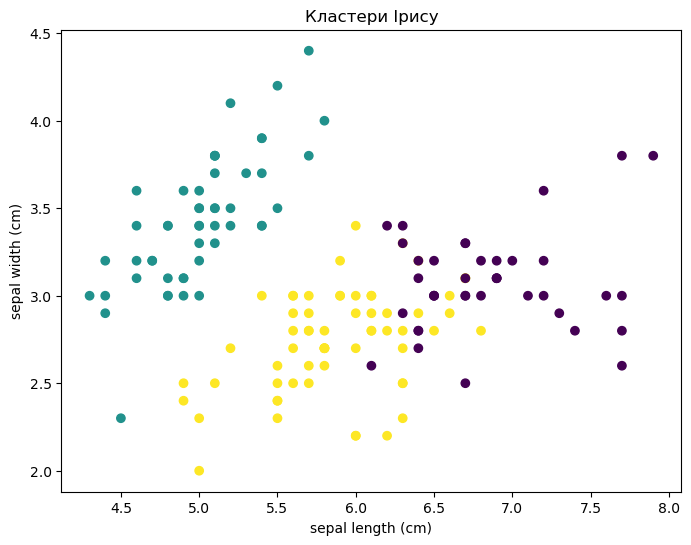


Датасет Student_data:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2

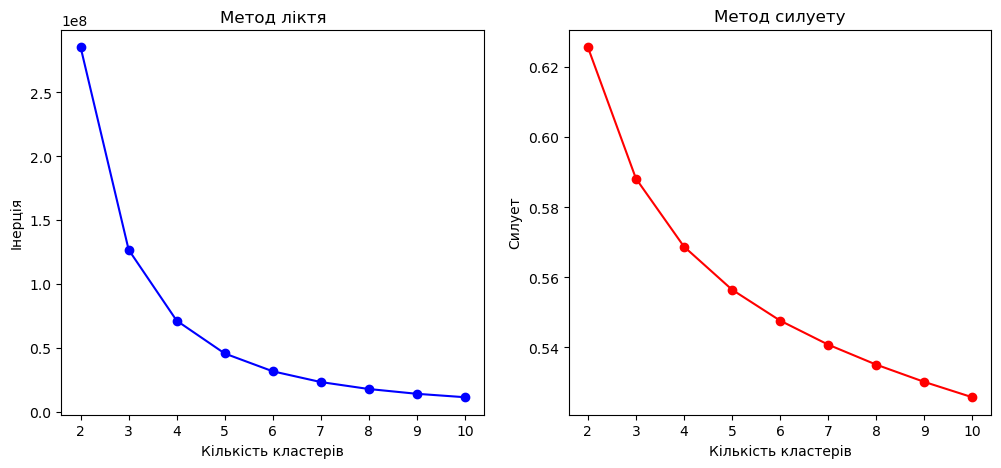

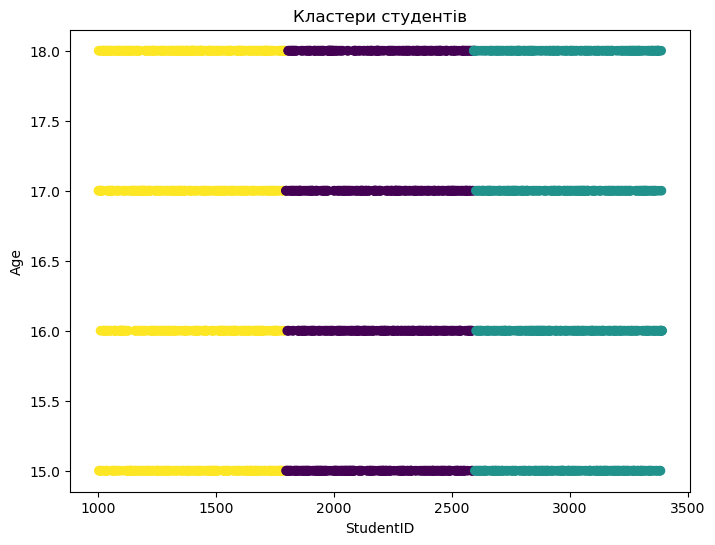

In [19]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Визначити тут
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Аналіз датасету Ірис
# Завантажити датасет Ірис
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Роздрукувати перші 5 рядочків
print("Датасет Ірис:")
print(iris_df.head())

# Визначити оптимальну кількість кластерів
# Метод ліктя
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(iris_df, kmeans.labels_))

# Візуалізація методу ліктя
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Метод ліктя')

# Візуалізація силуету
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')
plt.title('Метод силуету')
plt.show()

# Візуалізація кластерів
optimal_k = 3  # Припустимо, що оптимальна кількість кластерів - 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(iris_df)

plt.figure(figsize=(8, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['Cluster'], cmap='viridis')
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.title('Кластери Ірису')
plt.show()

# 2. Аналіз датасету Student_data.csv
file_path = r'C:\Users\paukd\Downloads\Student_data.csv'  # Шлях до завантаженого файлу
student_data = pd.read_csv(file_path)

# Попередній аналіз даних
print("\nДатасет Student_data:")
print(student_data.head())

# Вивести розмір датасету, типи даних
print(f"Розмір датасету: {student_data.shape}")
print(student_data.dtypes)

# Перевірити на пропущені значення
missing_values = student_data.isnull().sum()
print(f"Пропущені значення:\n{missing_values}")

# При наявності пропущених значень замінити на середнє за стовпцем
student_data.fillna(student_data.mean(), inplace=True)

# Перевірити на дублікати
duplicates = student_data.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Якщо є дублікати – видалити їх
student_data.drop_duplicates(inplace=True)

# Вивести описову статистику
print(student_data.describe())

# Визначити, яку задачу розв’язуємо (регресія чи класифікація)
# Це задача регресії, оскільки ми прогнозуємо GPA.
# Вибір ознак та цільової змінної
X = student_data.drop(columns=['GPA', 'StudentID'])  # Видаляємо цільову змінну та ідентифікатор
y = student_data['GPA']

# Поділ даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудувати 3 моделі на вибір для визначення оцінки
models = {
    "Лінійна регресія": LinearRegression(),
    "Дерево рішень": DecisionTreeRegressor(),
    "Случайний ліс": RandomForestRegressor()
}

# Оцінка моделей
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"  MSE: {mse:.4f}, R^2: {r2:.4f}")

# Визначити методом ліктя і силуетів оптимальну кількість кластерів
# Метод ліктя для кластеризації (наприклад, KMeans)
inertia = []
silhouette_scores = []
K = range(2, 11)

# Зберемо тільки числові дані
numeric_data = student_data.select_dtypes(include=[np.number])

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(numeric_data, kmeans.labels_))

# Візуалізація методу ліктя
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Метод ліктя')

# Візуалізація силуету
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')
plt.title('Метод силуету')
plt.show()

# Візуалізація кластерів (оптимальна кількість кластерів)
optimal_k = 3  # Припустимо, що оптимальна кількість кластерів - 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
student_data['Cluster'] = kmeans.fit_predict(numeric_data)

plt.figure(figsize=(8, 6))
plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=student_data['Cluster'], cmap='viridis')
plt.xlabel(numeric_data.columns[0])
plt.ylabel(numeric_data.columns[1])
plt.title('Кластери студентів')
plt.show()
